In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from datetime import date
import math  

# Load data

In [8]:
path_global = 'Data/covid_19_clean_complete.csv'
df_global = pd.read_csv(path_global, parse_dates=['Date'])


# Introduction

I am from Colombia so I am interested in comparing how COVID 19 is evolving in my home country compare with different countries and if the decisions or news appearing in the country have any effect.

# Comparison total cases
Here I am comparing the COVID cases in Colombia with various countries: 
1. Canada (the country I live)
2. Italy  
3. Spain
4. South Korea 

In [9]:
countryList = ['Colombia', 'Canada', 'Italy', 'Spain', 'South Korea', 'Mexico']
df_global.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.1533,20.1683,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.0339,1.6596,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.5063,1.5218,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.2027,17.8739,2020-01-22,0,0,0,0,Africa


In [10]:
# Data for countries of interest
df_Colombia = df_global[df_global['Country/Region'] == 'Colombia']
df_Canada =  df_global[df_global['Country/Region'] == 'Canada']
df_Italy =  df_global[df_global['Country/Region'] == 'Italy']
df_Spain =  df_global[df_global['Country/Region'] == 'Spain']
df_SouthKorea =  df_global[df_global['Country/Region'] == 'South Korea']
df_Mexico =  df_global[df_global['Country/Region'] == 'Mexico']

In [11]:
# Counting days from first confirmed case in each country (normalize)
# In the case of Colombia, data is accumulative 
initialDate_Colombia = df_Colombia[df_Colombia['Confirmed'] >= 1]
initialDate_Colombia = initialDate_Colombia['Date'].min()
print(initialDate_Colombia)

maxDate_Colombia = df_Colombia['Date'].max()
print(maxDate_Colombia)
df_Colombia = df_Colombia[:]
days_Colombia = (df_Colombia['Date'] - initialDate_Colombia)

df_Colombia['Day Number'] = days_Colombia.dt.days
df_Colombia['Confirmed Change'] = df_Colombia['Confirmed'].diff()
df_Colombia.tail()

2020-03-06 00:00:00
2020-06-12 00:00:00


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region,Day Number,Confirmed Change
36099,NaN,Colombia,4.5709,-74.2973,2020-06-08,40847,1373,16459,23015,Americas,94,2698.0
36360,NaN,Colombia,4.5709,-74.2973,2020-06-09,40847,1373,16459,23015,Americas,95,0.0
36621,NaN,Colombia,4.5709,-74.2973,2020-06-10,42206,1439,16566,24201,Americas,96,1359.0
36882,NaN,Colombia,4.5709,-74.2973,2020-06-11,43810,1505,17366,24939,Americas,97,1604.0
37143,NaN,Colombia,4.5709,-74.2973,2020-06-12,45344,1562,17823,25959,Americas,98,1534.0


In [12]:
# Counting days from first confirmed case in each country (normalize)
# For Canada, the data is by province, I group by for this first comparison
initialDate_Canada = df_Canada[df_Canada['Confirmed'] >= 1]
initialDate_Canada = initialDate_Canada['Date'].min()
print(initialDate_Canada)

maxDate_Canada = df_Canada['Date'].max()
print(maxDate_Canada)

df_Canada = df_Canada.groupby(['Date']).sum().reset_index()
df_Canada = df_Canada[:]
df_Canada['Day Number'] = (df_Canada['Date'] - initialDate_Canada).dt.days
df_Canada['Confirmed Change'] = df_Canada['Confirmed'].diff()
df_Canada.tail()

2020-01-26 00:00:00
2020-06-12 00:00:00


,Date,Lat,Long,Confirmed,Deaths,Recovered,Active,Day Number,Confirmed Change
138,2020-06-08,634.1118,-1114.9634,97766,7909,0,89857,134,601.0
139,2020-06-09,634.1118,-1114.9634,98228,7969,0,90259,135,462.0
140,2020-06-10,634.1118,-1114.9634,98707,8037,0,90670,136,479.0
141,2020-06-11,634.1118,-1114.9634,99146,8070,0,91076,137,439.0
142,2020-06-12,634.1118,-1114.9634,99582,8124,0,91458,138,436.0


In [13]:
# Counting days from first confirmed case in each country (normalize)
initialDate_Italy = df_Italy[df_Italy['Confirmed'] >= 1]
initialDate_Italy = initialDate_Italy['Date'].min()
print(initialDate_Italy)
df_Italy = df_Italy[:]
df_Italy['Day Number'] = (df_Italy['Date'] - initialDate_Italy).dt.days
df_Italy['Confirmed Change'] = df_Italy['Confirmed'].diff()
df_Italy.tail()

2020-01-31 00:00:00


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region,Day Number,Confirmed Change
36153,NaN,Italy,43.0,12.0,2020-06-08,235278,33964,166584,34730,Europe,129,280.0
36414,NaN,Italy,43.0,12.0,2020-06-09,235561,34043,168646,32872,Europe,130,283.0
36675,NaN,Italy,43.0,12.0,2020-06-10,235763,34114,169939,31710,Europe,131,202.0
36936,NaN,Italy,43.0,12.0,2020-06-11,236142,34167,171338,30637,Europe,132,379.0
37197,NaN,Italy,43.0,12.0,2020-06-12,236305,34223,173085,28997,Europe,133,163.0


In [14]:
# Counting days from first confirmed case in each country (normalize)
initialDate_Spain = df_Spain[df_Spain['Confirmed'] >= 1]
initialDate_Spain = initialDate_Spain['Date'].min()
print(initialDate_Spain)
df_Spain = df_Spain[:]
df_Spain['Day Number'] = (df_Spain['Date'] - initialDate_Spain).dt.days
df_Spain['Confirmed Change'] = df_Spain['Confirmed'].diff()
df_Spain.tail()

2020-02-01 00:00:00


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region,Day Number,Confirmed Change
36217,NaN,Spain,40.0,-4.0,2020-06-08,241717,27136,150376,64205,Europe,128,167.0
36478,NaN,Spain,40.0,-4.0,2020-06-09,241966,27136,150376,64454,Europe,129,249.0
36739,NaN,Spain,40.0,-4.0,2020-06-10,242280,27136,150376,64768,Europe,130,314.0
37000,NaN,Spain,40.0,-4.0,2020-06-11,242707,27136,150376,65195,Europe,131,427.0
37261,NaN,Spain,40.0,-4.0,2020-06-12,243209,27136,150376,65697,Europe,132,502.0


In [15]:
# Counting days from first confirmed case in each country (normalize)
initialDate_SouthKorea = df_SouthKorea[df_SouthKorea['Confirmed'] >= 1]
initialDate_SouthKorea = initialDate_SouthKorea['Date'].min()
print(initialDate_SouthKorea)
df_SouthKorea = df_SouthKorea[:]
df_SouthKorea['Day Number'] = (df_SouthKorea['Date'] - initialDate_SouthKorea).dt.days
df_SouthKorea['Confirmed Change'] = df_SouthKorea['Confirmed'].diff()
df_SouthKorea.tail()

2020-01-22 00:00:00


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region,Day Number,Confirmed Change
36159,NaN,South Korea,36.0,128.0,2020-06-08,11852,274,10589,989,Western Pacific,138,38.0
36420,NaN,South Korea,36.0,128.0,2020-06-09,11902,276,10611,1015,Western Pacific,139,50.0
36681,NaN,South Korea,36.0,128.0,2020-06-10,11947,276,10654,1017,Western Pacific,140,45.0
36942,NaN,South Korea,36.0,128.0,2020-06-11,12003,277,10669,1057,Western Pacific,141,56.0
37203,NaN,South Korea,36.0,128.0,2020-06-12,12051,277,10691,1083,Western Pacific,142,48.0


In [16]:
# Counting days from first confirmed case in each country (normalize)
initialDate_Mexico = df_Mexico[df_Mexico['Confirmed'] >= 1]
initialDate_Mexico = initialDate_Mexico['Date'].min()
print(initialDate_Mexico)
df_Mexico = df_Mexico[:]
df_Mexico['Day Number'] = (df_Mexico['Date'] - initialDate_Mexico).dt.days
df_Mexico['Confirmed Change'] = df_Mexico['Confirmed'].diff()
df_Mexico.tail()

2020-02-28 00:00:00


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region,Day Number,Confirmed Change
36174,NaN,Mexico,23.6345,-102.5528,2020-06-08,120102,14053,87633,18416,Americas,101,2999.0
36435,NaN,Mexico,23.6345,-102.5528,2020-06-09,124301,14649,90748,18904,Americas,102,4199.0
36696,NaN,Mexico,23.6345,-102.5528,2020-06-10,129184,15357,93930,19897,Americas,103,4883.0
36957,NaN,Mexico,23.6345,-102.5528,2020-06-11,133974,15944,97198,20832,Americas,104,4790.0
37218,NaN,Mexico,23.6345,-102.5528,2020-06-12,139196,16448,100876,21872,Americas,105,5222.0


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  from ipykernel import kernelapp as app


Text(0, 0.5, 'log(#Cases)')

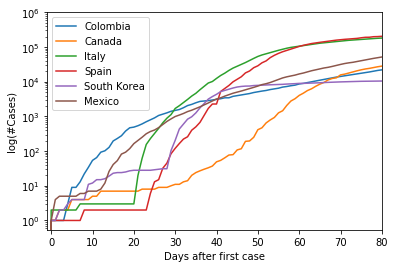

In [17]:
# Comparison between Colombia and Canada behaviour
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_yscale('log')

plt.plot(df_Colombia['Day Number'], df_Colombia['Confirmed'], label='Colombia')
plt.plot(df_Canada['Day Number'], df_Canada['Confirmed'], label='Canada')
plt.plot(df_Italy['Day Number'], df_Italy['Confirmed'], label='Italy')
plt.plot(df_Spain['Day Number'], df_Spain['Confirmed'], label='Spain')
plt.plot(df_SouthKorea['Day Number'], df_SouthKorea['Confirmed'], label='South Korea')
plt.plot(df_Mexico['Day Number'], df_Mexico['Confirmed'], label='Mexico')

ax.legend()
ax.set_xlim(-1, 80)
ax.set_ylim(0, 1000000)
plt.xlabel('Days after first case')
plt.ylabel('log(#Cases)')



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  from ipykernel import kernelapp as app


Text(0, 0.5, '#Confirmed cases change')

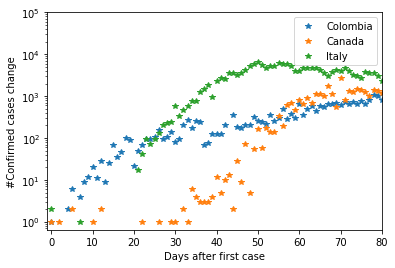

In [18]:
# Comparison between Colombia and Canada behaviour
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_yscale('log')

plt.plot(df_Colombia['Day Number'], df_Colombia['Confirmed Change'],'*', label='Colombia')
plt.plot(df_Canada['Day Number'], df_Canada['Confirmed Change'],'*', label='Canada')
plt.plot(df_Italy['Day Number'], df_Italy['Confirmed Change'],'*', label='Italy')
#plt.plot(df_Spain['Day Number'], df_Spain['Confirmed Change'],'*', label='Spain')
#plt.plot(df_SouthKorea['Day Number'], df_SouthKorea['Confirmed Change'],'*', label='South Korea')
#plt.plot(df_Mexico['Day Number'], df_Mexico['Confirmed Change'],'*', label='Mexico')

ax.legend()
ax.set_xlim(-1, 80)
ax.set_ylim(0, 100000)
plt.xlabel('Days after first case')
plt.ylabel('#Confirmed cases change')

Text(0.04, 0.5, 'Number of cases')

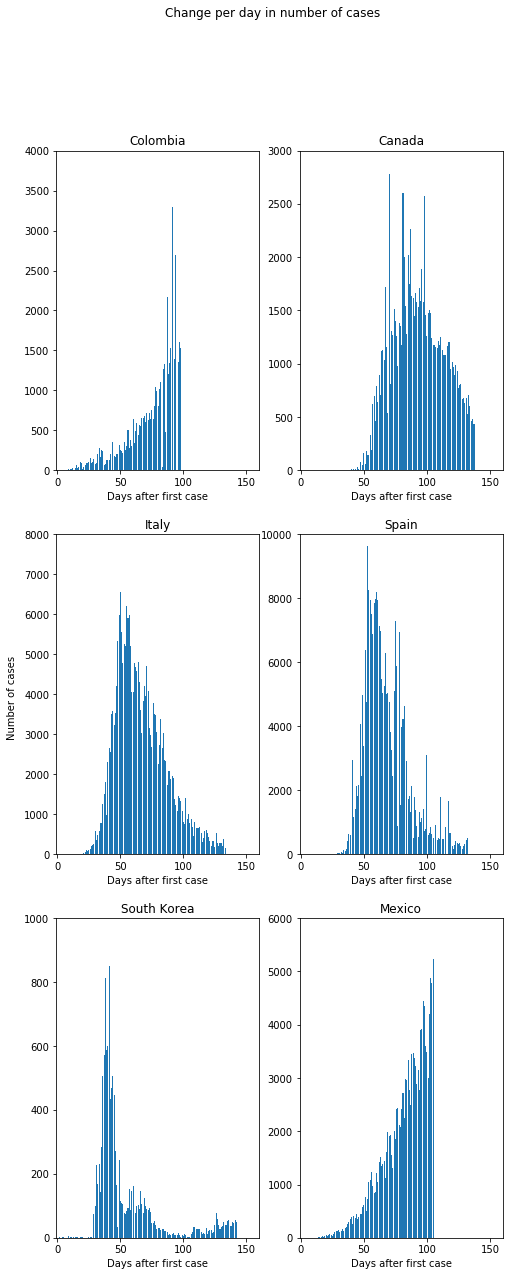

In [28]:
# Comparison between Colombia and Canada behaviour
fig, ax = plt.subplots(3,2, sharex=True, sharey=True, figsize=(8, 20))

         
plt.subplot(3, 2, 1)
plt.bar(df_Colombia['Day Number'], df_Colombia['Confirmed Change'], label='Colombia')
plt.title('Colombia')
plt.xlabel("Days after first case")
xmin, xmax, ymin, ymax = plt.axis([-1, 160, 0, 4000])

plt.subplot(3, 2, 2)
plt.bar(df_Canada['Day Number'], df_Canada['Confirmed Change'], label='Canada')
plt.title('Canada')
plt.xlabel("Days after first case")
xmin, xmax, ymin, ymax = plt.axis([-1, 160, 0, 3000])

plt.subplot(3, 2, 3)
plt.bar(df_Italy['Day Number'], df_Italy['Confirmed Change'], label='Italy')
plt.title('Italy')
plt.xlabel("Days after first case")
xmin, xmax, ymin, ymax = plt.axis([-1, 160, 0, 8000]) 

plt.subplot(3, 2, 4)
plt.bar(df_Spain['Day Number'], df_Spain['Confirmed Change'], label='Spain')
plt.title('Spain')
plt.xlabel("Days after first case")
xmin, xmax, ymin, ymax = plt.axis([-1, 160, 0, 10000])

plt.subplot(3, 2, 5)
plt.bar(df_SouthKorea['Day Number'], df_SouthKorea['Confirmed Change'], label='South Korea')
plt.title('South Korea')
plt.xlabel("Days after first case")
xmin, xmax, ymin, ymax = plt.axis([-1, 160, 0, 1000])

plt.subplot(3, 2, 6)
plt.bar(df_Mexico['Day Number'], df_Mexico['Confirmed Change'], label='Mexico')
plt.title('Mexico')
plt.xlabel("Days after first case")
xmin, xmax, ymin, ymax = plt.axis([-1, 160, 0, 6000])    

title_Fig = 'Change per day in number of cases'
fig.suptitle(title_Fig)

fig.text(0.04, 0.5, ('Number of cases'), va='center', rotation='vertical')